In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import sys
sys.path.append("../")

from machinelearning_fedbatch import main, plot_net_predictions
from src.utils import get_data_and_feed, plot_experiment, get_volume

FILENAME = "../data/data_processed.xlsx"
EXPERIMENT = "BR01"
S_IN = 1.43 * 200

Dataset shape: (11, 8)


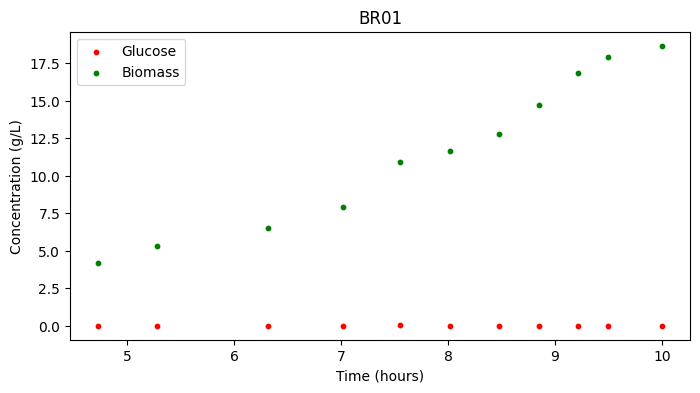

In [10]:
full_df, feeds = get_data_and_feed(file_name=FILENAME, experiment=EXPERIMENT, keep_only='FB')

# Get initial volume
V0 = full_df['V'].iloc[0]

print(f"Dataset shape: {full_df.shape}")

plot_experiment(full_df, title=EXPERIMENT)

In [11]:
train_df = full_df.iloc[:999]

net, u_pred, loss = main(train_df=train_df, full_df=full_df, feeds=feeds, Sin=S_IN, V0=V0, num_epochs=30000)

Epoch 0, Loss 115.0833
mu_max: 0.6999, K_s: 0.1401, Y_xs: 0.5001
Epoch 100, Loss 15.8564
mu_max: 0.7026, K_s: 0.1378, Y_xs: 0.4940
Epoch 200, Loss 9.0340
mu_max: 0.7020, K_s: 0.1385, Y_xs: 0.4892
Epoch 300, Loss 8.7146
mu_max: 0.7020, K_s: 0.1387, Y_xs: 0.4835
Epoch 400, Loss 8.1205
mu_max: 0.7020, K_s: 0.1387, Y_xs: 0.4776
Epoch 500, Loss 7.6262
mu_max: 0.7021, K_s: 0.1387, Y_xs: 0.4716
Epoch 600, Loss 6.8431
mu_max: 0.7021, K_s: 0.1387, Y_xs: 0.4658
Epoch 700, Loss 6.0124
mu_max: 0.7021, K_s: 0.1386, Y_xs: 0.4605
Epoch 800, Loss 5.1696
mu_max: 0.7021, K_s: 0.1385, Y_xs: 0.4561
Epoch 900, Loss 4.3558
mu_max: 0.7019, K_s: 0.1387, Y_xs: 0.4530
Epoch 1000, Loss 3.6535
mu_max: 0.7016, K_s: 0.1390, Y_xs: 0.4515
Epoch 1100, Loss 3.2184
mu_max: 0.7015, K_s: 0.1391, Y_xs: 0.4517
Epoch 1200, Loss 3.0611
mu_max: 0.7017, K_s: 0.1389, Y_xs: 0.4530
Epoch 1300, Loss 3.0036
mu_max: 0.7022, K_s: 0.1384, Y_xs: 0.4552
Epoch 1400, Loss 2.9461
mu_max: 0.7028, K_s: 0.1378, Y_xs: 0.4577
Epoch 1500, Loss 2.

mu_max = 0.7468
Ks = 0.0982
Yxs = 0.5717


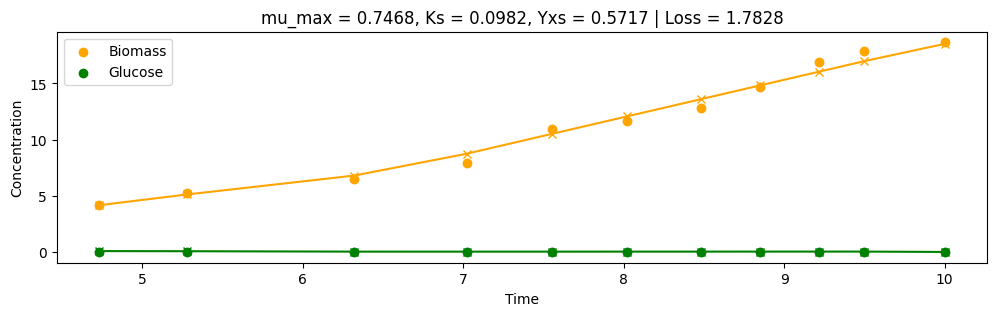

In [12]:
print(f'mu_max = {net.mu_max.item():.4f}')
print(f'Ks = {net.K_s.item():.4f}')
print(f'Yxs = {net.Y_xs.item():.4f}')    

title = f"mu_max = {net.mu_max.item():.4f}, Ks = {net.K_s.item():.4f}, Yxs = {net.Y_xs.item():.4f} | Loss = {loss:.4f}"
plot_net_predictions(full_df=full_df, train_df=train_df, u_pred=u_pred, title=title)